<a href="https://colab.research.google.com/github/mb8655/Python/blob/main/Common_DataFrames_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Common Pandas Operations
We will use the data set from NYC OpenData called "New York City Leading Causes of Death".

In [1]:
%matplotlib inline
import requests
import pandas as pd
import numpy as np

#Fetching the data
We fetch the data in JSON format using the NYC OpenData API:

In [2]:
# Data set: New York City Leading Causes of Death
# https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam
url = 'http://data.cityofnewyork.us/api/views/jb7j-dtam/rows.json'
results = requests.get(url).json()

In [3]:
# view data dict
results.keys()

dict_keys(['meta', 'data'])

dict_keys(['meta', 'data'])
There are two main fields in the returned JSON. The meta part that describes the metadata, and the actual data.

In [4]:
#view the metadata
results['meta']['view'].keys()

dict_keys(['id', 'name', 'assetType', 'attribution', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'locked', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'approvals', 'clientContext', 'columns', 'grants', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

In [5]:
results['data']

[['row-qupq-7iik.acsp',
  '00000000-0000-0000-85AB-5F87A996A300',
  0,
  1733776505,
  None,
  1733776505,
  None,
  '{ }',
  '2007',
  'Diabetes Mellitus (E10-E14)',
  'M',
  'Other Race/ Ethnicity',
  '11',
  '.',
  '.'],
 ['row-s8an-xgaf.eb4t',
  '00000000-0000-0000-5DC3-A9FF70A70774',
  0,
  1733776505,
  None,
  1733776505,
  None,
  '{ }',
  '2010',
  'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
  'F',
  'Not Stated/Unknown',
  '70',
  '.',
  '.'],
 ['row-68me_j7hb_a7yy',
  '00000000-0000-0000-FDE0-47C6EDC2A52E',
  0,
  1733776505,
  None,
  1733776505,
  None,
  '{ }',
  '2007',
  'Cerebrovascular Disease (Stroke: I60-I69)',
  'M',
  'Black Non-Hispanic',
  '213',
  '25',
  '33'],
 ['row-bh3s_5dw5_zhf5',
  '00000000-0000-0000-3231-0B9575966E6B',
  0,
  1733776505,
  None,
  1733776505,
  None,
  '{ }',
  '2007',
  'Atherosclerosis (I70)',
  'F',
  'Other Race/ Ethnicity',
  '.',
  '.',
  '.'],
 ['row-bp6v-stuc~hy7b',
  '00000000-0000-0000-BBA7-44D13389B1EE',
  0,
  17337765

#Creating a DataFrame from JSON data
Let's create a pandas dataframe from the results["data"] part.

In [6]:
df = pd.DataFrame(results['data'])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,row-qupq-7iik.acsp,00000000-0000-0000-85AB-5F87A996A300,0,1733776505,None,1733776505,None,{ },2007,Diabetes Mellitus (E10-E14),M,Other Race/ Ethnicity,11,.,.
1,row-s8an-xgaf.eb4t,00000000-0000-0000-5DC3-A9FF70A70774,0,1733776505,None,1733776505,None,{ },2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Not Stated/Unknown,70,.,.
2,row-68me_j7hb_a7yy,00000000-0000-0000-FDE0-47C6EDC2A52E,0,1733776505,None,1733776505,None,{ },2007,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,213,25,33
3,row-bh3s_5dw5_zhf5,00000000-0000-0000-3231-0B9575966E6B,0,1733776505,None,1733776505,None,{ },2007,Atherosclerosis (I70),F,Other Race/ Ethnicity,.,.,.
4,row-bp6v-stuc~hy7b,00000000-0000-0000-BBA7-44D13389B1EE,0,1733776505,None,1733776505,None,{ },2014,Malignant Neoplasms (Cancer: C00-C97),F,Black Non-Hispanic,1852,176.5,148.4


#Adding Column Names
Hm, this is kind of ugly without column names...

We need to peek at the "meta" part to find information about the columns.

In [7]:
#column names are in the metadata

columns = results["meta"]["view"]["columns"]
columns

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'updated_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':updated_at'

In [8]:
#create a list of column names
header = [c['fieldName'] for c in columns]

header

[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'year',
 'leading_cause',
 'sex',
 'race_ethnicity',
 'deaths',
 'death_rate',
 'age_adjusted_death_rate']

In [9]:
#pass the list into the dataframe to create the column names
df = pd.DataFrame(results['data'], columns=header)
df.head()

,:sid,:id,:position,:created_at,:created_meta,:updated_at,:updated_meta,:meta,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,row-qupq-7iik.acsp,00000000-0000-0000-85AB-5F87A996A300,0,1733776505,None,1733776505,None,{ },2007,Diabetes Mellitus (E10-E14),M,Other Race/ Ethnicity,11,.,.
1,row-s8an-xgaf.eb4t,00000000-0000-0000-5DC3-A9FF70A70774,0,1733776505,None,1733776505,None,{ },2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Not Stated/Unknown,70,.,.
2,row-68me_j7hb_a7yy,00000000-0000-0000-FDE0-47C6EDC2A52E,0,1733776505,None,1733776505,None,{ },2007,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,213,25,33
3,row-bh3s_5dw5_zhf5,00000000-0000-0000-3231-0B9575966E6B,0,1733776505,None,1733776505,None,{ },2007,Atherosclerosis (I70),F,Other Race/ Ethnicity,.,.,.
4,row-bp6v-stuc~hy7b,00000000-0000-0000-BBA7-44D13389B1EE,0,1733776505,None,1733776505,None,{ },2014,Malignant Neoplasms (Cancer: C00-C97),F,Black Non-Hispanic,1852,176.5,148.4


#Deleting Columns and/or Rows
We do not need all these columns. Let's drop a few that we will definitely not use. For that, we will use the drop command

In [10]:
df.drop(labels= [':sid', ':position', ':meta', ':created_meta', ':updated_meta'],
        axis='columns', inplace=True)

df.head()

,:id,:created_at,:updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,00000000-0000-0000-85AB-5F87A996A300,1733776505,1733776505,2007,Diabetes Mellitus (E10-E14),M,Other Race/ Ethnicity,11,.,.
1,00000000-0000-0000-5DC3-A9FF70A70774,1733776505,1733776505,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Not Stated/Unknown,70,.,.
2,00000000-0000-0000-FDE0-47C6EDC2A52E,1733776505,1733776505,2007,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,213,25,33
3,00000000-0000-0000-3231-0B9575966E6B,1733776505,1733776505,2007,Atherosclerosis (I70),F,Other Race/ Ethnicity,.,.,.
4,00000000-0000-0000-BBA7-44D13389B1EE,1733776505,1733776505,2014,Malignant Neoplasms (Cancer: C00-C97),F,Black Non-Hispanic,1852,176.5,148.4


#Common Patterns: axis and inplace
The axis='columns' says that we are looking to drop columns. If we had axis='index' we would be dropping rows with the passed id's. The ids for the row is the index value for the row.

The inplace=True specifies that we will not be creating a new dataframe, but we just replace the current one, with the new dataframe that has fewer columns.

In [11]:
df

,:id,:created_at,:updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,00000000-0000-0000-85AB-5F87A996A300,1733776505,1733776505,2007,Diabetes Mellitus (E10-E14),M,Other Race/ Ethnicity,11,.,.
1,00000000-0000-0000-5DC3-A9FF70A70774,1733776505,1733776505,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Not Stated/Unknown,70,.,.
2,00000000-0000-0000-FDE0-47C6EDC2A52E,1733776505,1733776505,2007,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,213,25,33
3,00000000-0000-0000-3231-0B9575966E6B,1733776505,1733776505,2007,Atherosclerosis (I70),F,Other Race/ Ethnicity,.,.,.
4,00000000-0000-0000-BBA7-44D13389B1EE,1733776505,1733776505,2014,Malignant Neoplasms (Cancer: C00-C97),F,Black Non-Hispanic,1852,176.5,148.4
...,...,...,...,...,...,...,...,...,...,...
1089,00000000-0000-0000-2259-D3EC931A567A,1733776505,1733776505,2013,All Other Causes,M,White Non-Hispanic,2293,170.3,143.3
1090,00000000-0000-0000-D33D-9EA1CAB15A3A,1733776505,1733776505,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Not Stated/Unknown,94,.,.
1091,00000000-0000-0000-8F6B-49D2BDC18CF3,1733776505,1733776505,2008,Human Immunodeficiency Virus Disease (HIV: B20...,M,Not Stated/Unknown,9,.,.
1092,00000000-0000-0000-E015-C94191CE3EEC,1733776505,1733776505,2010,Chronic Lower Respiratory Diseases (J40-J47),M,Hispanic,149,13,23.9


#Renaming Columns
We do not like some of these column names. Let's rename them.

We will use a dictionary, for specifying the existing and the new names for the columns.

In [12]:
# this dict specifies as a key the existing name and new name

renaming_dict ={
    ':id': 'key',
    ':created_at': 'created_at',
    ':updated_at': 'updated_at'
}

df.rename(columns=renaming_dict, inplace=True)
df.head()


,key,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,00000000-0000-0000-85AB-5F87A996A300,1733776505,1733776505,2007,Diabetes Mellitus (E10-E14),M,Other Race/ Ethnicity,11,.,.
1,00000000-0000-0000-5DC3-A9FF70A70774,1733776505,1733776505,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Not Stated/Unknown,70,.,.
2,00000000-0000-0000-FDE0-47C6EDC2A52E,1733776505,1733776505,2007,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,213,25,33
3,00000000-0000-0000-3231-0B9575966E6B,1733776505,1733776505,2007,Atherosclerosis (I70),F,Other Race/ Ethnicity,.,.,.
4,00000000-0000-0000-BBA7-44D13389B1EE,1733776505,1733776505,2014,Malignant Neoplasms (Cancer: C00-C97),F,Black Non-Hispanic,1852,176.5,148.4


In [13]:
#view the dataframe data types
df.dtypes

,0
key,object
created_at,int64
updated_at,int64
year,object
leading_cause,object
sex,object
race_ethnicity,object
deaths,object
death_rate,object
age_adjusted_death_rate,object


In [14]:
# convert data type year
df['year'] = pd.to_numeric(df['year'])
df.dtypes

,0
key,object
created_at,int64
updated_at,int64
year,int64
leading_cause,object
sex,object
race_ethnicity,object
deaths,object
death_rate,object
age_adjusted_death_rate,object


##Sometimes, during the conversion of data, the cells contain values that cannot be properly converted. We can specify how we want pandas to handle such cases. By default, it will raise an exception, and will not allow us to convert the data to a new data type.

In [16]:
#this one will cause an error, since 'deaths' contain non-numeric values
#df['deaths'] = pd.to_numeric(df['deaths'])

##We can pass the errors command to specify what should happen. From the documentation of to_numeric, we get:

If ‘raise’, then invalid parsing will raise an exception
If ‘coerce’, then invalid parsing will be set as NaN
If ‘ignore’, then invalid parsing will return the input

In [17]:
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce')
df['death_rate'] = pd.to_numeric(df['death_rate'], errors='coerce')
df['age_adjusted_death_rate'] = pd.to_numeric(df['age_adjusted_death_rate'], errors='coerce')
df.dtypes

,0
key,object
created_at,int64
updated_at,int64
year,int64
leading_cause,object
sex,object
race_ethnicity,object
deaths,float64
death_rate,float64
age_adjusted_death_rate,float64


In [18]:
# review the dataframe with the changes
df

,key,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,00000000-0000-0000-85AB-5F87A996A300,1733776505,1733776505,2007,Diabetes Mellitus (E10-E14),M,Other Race/ Ethnicity,11.0,NaN,NaN
1,00000000-0000-0000-5DC3-A9FF70A70774,1733776505,1733776505,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Not Stated/Unknown,70.0,NaN,NaN
2,00000000-0000-0000-FDE0-47C6EDC2A52E,1733776505,1733776505,2007,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,213.0,25.0,33.0
3,00000000-0000-0000-3231-0B9575966E6B,1733776505,1733776505,2007,Atherosclerosis (I70),F,Other Race/ Ethnicity,NaN,NaN,NaN
4,00000000-0000-0000-BBA7-44D13389B1EE,1733776505,1733776505,2014,Malignant Neoplasms (Cancer: C00-C97),F,Black Non-Hispanic,1852.0,176.5,148.4
...,...,...,...,...,...,...,...,...,...,...
1089,00000000-0000-0000-2259-D3EC931A567A,1733776505,1733776505,2013,All Other Causes,M,White Non-Hispanic,2293.0,170.3,143.3
1090,00000000-0000-0000-D33D-9EA1CAB15A3A,1733776505,1733776505,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Not Stated/Unknown,94.0,NaN,NaN
1091,00000000-0000-0000-8F6B-49D2BDC18CF3,1733776505,1733776505,2008,Human Immunodeficiency Virus Disease (HIV: B20...,M,Not Stated/Unknown,9.0,NaN,NaN
1092,00000000-0000-0000-E015-C94191CE3EEC,1733776505,1733776505,2010,Chronic Lower Respiratory Diseases (J40-J47),M,Hispanic,149.0,13.0,23.9


In [19]:
#change data types of other values to categorical
df['leading_cause'] = pd.Categorical(df['leading_cause'])
df['sex'] = pd.Categorical(df['sex'])
df['race_ethnicity'] = pd.Categorical(df['race_ethnicity'])
df.dtypes

,0
key,object
created_at,int64
updated_at,int64
year,int64
leading_cause,category
sex,category
race_ethnicity,category
deaths,float64
death_rate,float64
age_adjusted_death_rate,float64


In [20]:
#switch timestamps and dates. Note we use s to specify seconds
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
df['updated_at'] = pd.to_datetime(df['updated_at'], unit='s')
df.dtypes

,0
key,object
created_at,datetime64[ns]
updated_at,datetime64[ns]
year,int64
leading_cause,category
sex,category
race_ethnicity,category
deaths,float64
death_rate,float64
age_adjusted_death_rate,float64


In [21]:
#sort the values by year
df.sort_values(by='year')


,key,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,00000000-0000-0000-85AB-5F87A996A300,2024-12-09 20:35:05,2024-12-09 20:35:05,2007,Diabetes Mellitus (E10-E14),M,Other Race/ Ethnicity,11.0,NaN,NaN
1079,00000000-0000-0000-FECF-7A58A8C85B15,2024-12-09 20:35:05,2024-12-09 20:35:05,2007,Influenza (Flu) and Pneumonia (J09-J18),M,Black Non-Hispanic,229.0,26.9,40.1
2,00000000-0000-0000-FDE0-47C6EDC2A52E,2024-12-09 20:35:05,2024-12-09 20:35:05,2007,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,213.0,25.0,33.0
1078,00000000-0000-0000-B534-60BBEF04A846,2024-12-09 20:35:05,2024-12-09 20:35:05,2007,"Assault (Homicide: Y87.1, X85-Y09)",M,Not Stated/Unknown,NaN,NaN,NaN
38,00000000-0000-0000-71E5-2496086D8623,2024-12-09 20:35:05,2024-12-09 20:35:05,2007,Essential Hypertension and Renal Diseases (I10...,M,Black Non-Hispanic,137.0,16.1,22.0
...,...,...,...,...,...,...,...,...,...,...
35,00000000-0000-0000-F7B9-F913C3F2A3B2,2024-12-09 20:35:05,2024-12-09 20:35:05,2014,Essential Hypertension and Renal Diseases (I10...,F,Hispanic,116.0,9.2,10.1
420,00000000-0000-0000-318A-E62926DC3C28,2024-12-09 20:35:05,2024-12-09 20:35:05,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Other Race/ Ethnicity,68.0,NaN,NaN
425,00000000-0000-0000-E419-3E5476DAA97E,2024-12-09 20:35:05,2024-12-09 20:35:05,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,4507.0,318.0,161.0
431,00000000-0000-0000-F7C3-E3CE3F66998F,2024-12-09 20:35:05,2024-12-09 20:35:05,2014,Alzheimer's Disease (G30),F,Asian and Pacific Islander,26.0,4.2,4.7


#Perform Exploratory Data Analysis


In [22]:
# race values
df['race_ethnicity'].value_counts()

,count
race_ethnicity,
Not Stated/Unknown,200
Other Race/ Ethnicity,186
Black Non-Hispanic,178
Asian and Pacific Islander,177
Hispanic,177
White Non-Hispanic,176


In [23]:
#review sex breakdown
df['sex'].value_counts()

,count
sex,
F,554
M,540


In [24]:
#leading cause breakdown
df['leading_cause'].value_counts()

,count
leading_cause,
All Other Causes,96
"Diseases of Heart (I00-I09, I11, I13, I20-I51)",96
Influenza (Flu) and Pneumonia (J09-J18),96
Malignant Neoplasms (Cancer: C00-C97),96
Diabetes Mellitus (E10-E14),92
Cerebrovascular Disease (Stroke: I60-I69),90
Chronic Lower Respiratory Diseases (J40-J47),88
"Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)",80
"Essential Hypertension and Renal Diseases (I10, I12)",75


In [25]:
#create pivot table to view the leading cause compared to race and sex
import numpy as np
pivot = pd.pivot_table(df,
                       values='deaths',
                       index='leading_cause',               #rows
                       columns=['sex','race_ethnicity'],    #columns
                       aggfunc=np.sum)                      #aggregate function
pivot

<ipython-input-25-0b21d305e33a>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df,
<ipython-input-25-0b21d305e33a>:3: FutureWarning: The provided callable <function sum at 0x7f7c113c82c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(df,


sex                                                                         F  \
race_ethnicity                                     Asian and Pacific Islander   
leading_cause                                                                   
Accidents Except Drug Posioning (V01-X39, X43, ...                      284.0   
All Other Causes                                                       2118.0   
Alzheimer's Disease (G30)                                                64.0   
Aortic Aneurysm and Dissection (I71)                                      0.0   
Assault (Homicide: Y87.1, X85-Y09)                                        0.0   
Atherosclerosis (I70)                                                     0.0   
Cerebrovascular Disease (Stroke: I60-I69)                               677.0   
Certain Conditions originating in the Perinatal...                       18.0   
Chronic Liver Disease and Cirrhosis (K70, K73)                            0.0   
Chronic Lower Respiratory Diseases (J40-J47)                            249.0   
Congenital Malformations, Deformations, and Chr...                        0.0   
Diabetes Mellitus (E10-E14)                                             405.0   
Diseases of Heart (I00-I09, I11, I13, I20-I51)                         3429.0   
Essential Hypertension and Renal Diseases (I10,...                      269.0   
Human Immunodeficiency Virus Disease (HIV: B20-...                        0.0   
Influenza (Flu) and Pneumonia (J09-J18)                                 603.0   
Insitu or Benign / Uncertain Neoplasms (D00-D48)                          0.0   
Intentional Self-Harm (Suicide: X60-X84, Y87.0)                         164.0   
Malignant Neoplasms (Cancer: C00-C97)                                  3432.0   
Mental and Behavioral Disorders due to Accident...                        0.0   
Mental and Behavioral Disorders due to Use of A...                        0.0   
Nephritis, Nephrotic Syndrome and Nephrisis (N0...                       48.0   
Parkinson's Disease (G20)                                                 0.0   
Septicemia (A40-A41)                                                     16.0   
Tuberculosis (A16-A19)                                                    0.0   
Viral Hepatitis (B15-B19)                                                15.0   

sex                                                                    \
race_ethnicity                                     Black Non-Hispanic   
leading_cause                                                           
Accidents Except Drug Posioning (V01-X39, X43, ...              157.0   
All Other Causes                                              11178.0   
Alzheimer's Disease (G30)                                       601.0   
Aortic Aneurysm and Dissection (I71)                              0.0   
Assault (Homicide: Y87.1, X85-Y09)                                0.0   
Atherosclerosis (I70)                                             0.0   
Cerebrovascular Disease (Stroke: I60-I69)                      2147.0   
Certain Conditions originating in the Perinatal...                0.0   
Chronic Liver Disease and Cirrhosis (K70, K73)                    0.0   
Chronic Lower Respiratory Diseases (J40-J47)                   1651.0   
Congenital Malformations, Deformations, and Chr...                0.0   
Diabetes Mellitus (E10-E14)                                    3133.0   
Diseases of Heart (I00-I09, I11, I13, I20-I51)                19335.0   
Essential Hypertension and Renal Diseases (I10,...             1723.0   
Human Immunodeficiency Virus Disease (HIV: B20-...             1324.0   
Influenza (Flu) and Pneumonia (J09-J18)                        2288.0   
Insitu or Benign / Uncertain Neoplasms (D00-D48)                  0.0   
Intentional Self-Harm (Suicide: X60-X84, Y87.0)                   0.0   
Malignant Neoplasms (Cancer: C00-C97)                         14525.0   
Mental and Behavioral Disorders due to Accid

In [26]:
# we can transpose the data with the transpose() fucntion or using the pivot.T
pivot.transpose()


leading_cause                   Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)  \
sex race_ethnicity                                                                                 
F   Asian and Pacific Islander                                              284.0                  
    Black Non-Hispanic                                                      157.0                  
    Hispanic                                                                437.0                  
    Not Stated/Unknown                                                        0.0                  
    Other Race/ Ethnicity                                                     6.0                  
    White Non-Hispanic                                                     1392.0                  
M   Asian and Pacific Islander                                              463.0                  
    Black Non-Hispanic                                                     1044.0                  
    Hispanic                                                               1378.0                  
    Not Stated/Unknown                                                       58.0                  
    Other Race/ Ethnicity                                                    42.0                  
    White Non-Hispanic                                                     2206.0                  

leading_cause                   All Other Causes  Alzheimer's Disease (G30)  \
sex race_ethnicity                                                            
F   Asian and Pacific Islander            2118.0                       64.0   
    Black Non-Hispanic                   11178.0                      601.0   
    Hispanic                              7838.0                      605.0   
    Not Stated/Unknown                     307.0                        8.0   
    Other Race/ Ethnicity                  230.0                        0.0   
    White Non-Hispanic                   17272.0                     1702.0   
M   Asian and Pacific Islander            2479.0                        0.0   
    Black Non-Hispanic                   10228.0                        0.0   
    Hispanic                              9085.0                        0.0   
    Not Stated/Unknown                     548.0                        0.0   
    Other Race/ Ethnicity                  242.0                        0.0   
    White Non-Hispanic                   16474.0                        0.0   

leading_cause                   Aortic Aneurysm and Dissection (I71)  \
sex race_ethnicity                                                     
F   Asian and Pacific Islander                                   0.0   
    Black Non-Hispanic                                           0.0   
    Hispanic                                                     0.0   
    Not Stated/Unknown                                           0.0   
    Other Race/ Ethnicity                                        0.0   
    White Non-Hispanic                                           0.0   
M   Asian and Pacific Islander                                   0.0   
    Black Non-Hispanic                                           0.0   
    Hispanic                                                     0.0   
    Not Stated/Unknown                                           0.0   
    Other Race/ Ethnicity                                        0.0   
    White Non-Hispanic                                           0.0   

leading_cause                   Assault (Homicide: Y87.1, X85-Y09)  \
sex race_ethnicity                                                   
F   Asian and Pacific Islander                                 0.0   
    Black Non-Hispanic                                         0.0   
    Hispanic                                                   0.0   
    Not Stated/Unknown                                         0.0   
    Other Race/ Ethnicity                                      

<Axes: xlabel='sex,race_ethnicity'>

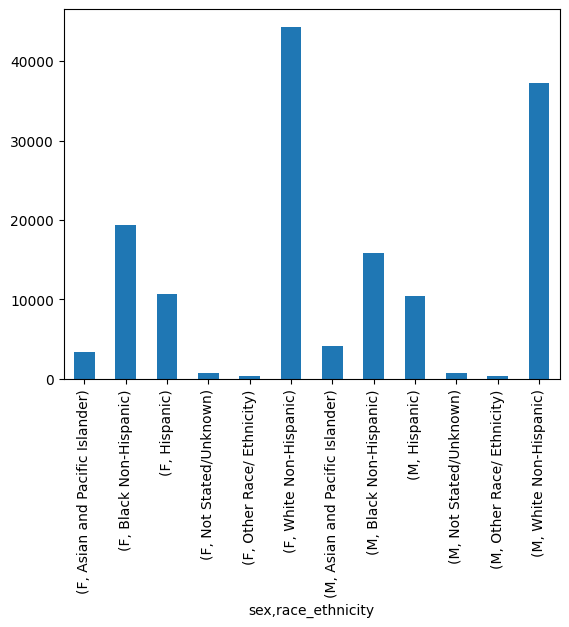

In [27]:
#plot the data
pivot.transpose()["Diseases of Heart (I00-I09, I11, I13, I20-I51)"].plot.bar()


Write a function that will change the values for the "leading cause" column, and make them shorter. For example, we want to eliminate the codes within the parentheses; the value "Alzheimer's Disease (G30)" should become "Alzheimer's Disease". Use the apply function and/or the map function to create a new column with the shortened values. Then use the drop command to delete the old leading_cause column.

Change the pivot_table to compute the average age_adjusted_death_rate instead of the sum of deaths. (Hint: you can use the numpy.mean function to compute averages.

In [28]:
# Example input:
# 'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)
# Example output
# 'Accidents Except Drug Posioning'
import re

def shorten(cause):
    # Get everything before the parentheses
    regex_expression = r'(.*)\(.*\)' # notice that we escape the parentheses
    regex= re.compile(regex_expression)
    matches = regex.finditer(cause)
    for m in matches:
        return m.group(1).strip()[:35]
    return cause[:35]

shorten('Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)')

'Accidents Except Drug Posioning'

In [29]:
[shorten(cause) for cause in set(df['leading_cause'].values)]


["Alzheimer's Disease",
 'Diabetes Mellitus',
 'Insitu or Benign / Uncertain Neopla',
 'Assault',
 'Intentional Self-Harm',
 'Cerebrovascular Disease',
 'Nephritis, Nephrotic Syndrome and N',
 'Aortic Aneurysm and Dissection',
 'Mental and Behavioral Disorders due',
 'Diseases of Heart',
 'All Other Causes',
 'Certain Conditions originating in t',
 'Atherosclerosis',
 'Congenital Malformations, Deformati',
 'Human Immunodeficiency Virus Diseas',
 'Mental and Behavioral Disorders due',
 'Tuberculosis',
 'Viral Hepatitis',
 'Accidents Except Drug Posioning',
 'Malignant Neoplasms',
 'Essential Hypertension and Renal Di',
 'Chronic Liver Disease and Cirrhosis',
 "Parkinson's Disease",
 'Influenza (Flu) and Pneumonia',
 'Septicemia',
 'Chronic Lower Respiratory Diseases']

In [30]:
df["cause"] = df["leading_cause"].apply(shorten)
df

,key,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate,cause
0,00000000-0000-0000-85AB-5F87A996A300,2024-12-09 20:35:05,2024-12-09 20:35:05,2007,Diabetes Mellitus (E10-E14),M,Other Race/ Ethnicity,11.0,NaN,NaN,Diabetes Mellitus
1,00000000-0000-0000-5DC3-A9FF70A70774,2024-12-09 20:35:05,2024-12-09 20:35:05,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Not Stated/Unknown,70.0,NaN,NaN,Diseases of Heart
2,00000000-0000-0000-FDE0-47C6EDC2A52E,2024-12-09 20:35:05,2024-12-09 20:35:05,2007,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,213.0,25.0,33.0,Cerebrovascular Disease
3,00000000-0000-0000-3231-0B9575966E6B,2024-12-09 20:35:05,2024-12-09 20:35:05,2007,Atherosclerosis (I70),F,Other Race/ Ethnicity,NaN,NaN,NaN,Atherosclerosis
4,00000000-0000-0000-BBA7-44D13389B1EE,2024-12-09 20:35:05,2024-12-09 20:35:05,2014,Malignant Neoplasms (Cancer: C00-C97),F,Black Non-Hispanic,1852.0,176.5,148.4,Malignant Neoplasms
...,...,...,...,...,...,...,...,...,...,...,...
1089,00000000-0000-0000-2259-D3EC931A567A,2024-12-09 20:35:05,2024-12-09 20:35:05,2013,All Other Causes,M,White Non-Hispanic,2293.0,170.3,143.3,All Other Causes
1090,00000000-0000-0000-D33D-9EA1CAB15A3A,2024-12-09 20:35:05,2024-12-09 20:35:05,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Not Stated/Unknown,94.0,NaN,NaN,Diseases of Heart
1091,00000000-0000-0000-8F6B-49D2BDC18CF3,2024-12-09 20:35:05,2024-12-09 20:35:05,2008,Human Immunodeficiency Virus Disease (HIV: B20...,M,Not Stated/Unknown,9.0,NaN,NaN,Human Immunodeficiency Virus Diseas
1092,00000000-0000-0000-E015-C94191CE3EEC,2024-12-09 20:35:05,2024-12-09 20:35:05,2010,Chronic Lower Respiratory Diseases (J40-J47),M,Hispanic,149.0,13.0,23.9,Chronic Lower Respiratory Diseases


In [31]:
import numpy as np
pivot = pd.pivot_table(df,
                       values='deaths',
                       index=['cause'], # rows
                       columns=['sex', 'race_ethnicity'], # columns
                       aggfunc=np.mean) # aggregation function
pivot

<ipython-input-31-9cbce9810cd1>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df,
<ipython-input-31-9cbce9810cd1>:2: FutureWarning: The provided callable <function mean at 0x7f7c113c93a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = pd.pivot_table(df,


sex                                                          F  \
race_ethnicity                      Asian and Pacific Islander   
cause                                                            
Accidents Except Drug Posioning                      35.500000   
All Other Causes                                    264.750000   
Alzheimer's Disease                                  21.333333   
Assault                                                    NaN   
Cerebrovascular Disease                              84.625000   
Certain Conditions originating in t                  18.000000   
Chronic Liver Disease and Cirrhosis                        NaN   
Chronic Lower Respiratory Diseases                   31.125000   
Congenital Malformations, Deformati                        NaN   
Diabetes Mellitus                                    50.625000   
Diseases of Heart                                   428.625000   
Essential Hypertension and Renal Di                  33.625000   
Human Immunodeficiency Virus Diseas                        NaN   
Influenza (Flu) and Pneumonia                        75.375000   
Insitu or Benign / Uncertain Neopla                        NaN   
Intentional Self-Harm                                23.428571   
Malignant Neoplasms                                 429.000000   
Mental and Behavioral Disorders due                        NaN   
Nephritis, Nephrotic Syndrome and N                  16.000000   
Septicemia                                           16.000000   
Viral Hepatitis                                      15.000000   

sex                                                                  \
race_ethnicity                      Black Non-Hispanic     Hispanic   
cause                                                                 
Accidents Except Drug Posioning              78.500000    62.428571   
All Other Causes                           1397.250000   979.750000   
Alzheimer's Disease                         100.166667   100.833333   
Assault                                            NaN          NaN   
Cerebrovascular Disease                     268.375000   178.500000   
Certain Conditions originating in t                NaN          NaN   
Chronic Liver Disease and Cirrhosis                NaN    61.000000   
Chronic Lower Respiratory Diseases          206.375000   157.250000   
Congenital Malformations, Deformati                NaN          NaN   
Diabetes Mellitus                           391.625000   211.625000   
Diseases of Heart                          2416.875000  1328.750000   
Essential Hypertension and Renal Di         215.375000    95.500000   
Human Immunodeficiency Virus Diseas         165.500000    93.400000   
Influenza (Flu) and Pneumonia               286.000000   213.750000   
Insitu or Benign / Uncertain Neopla                NaN          NaN   
Intentional Self-Harm                              NaN          NaN   
Malignant Neoplasms                        1815.625000  1083.750000   
Mental and Behavioral Disorders due          87.000000    58.666667   
Nephritis, Nephrotic Syndrome and N          82.000000          NaN   
Septicemia                                   89.000000    49.000000   
Viral Hepatitis                                    NaN          NaN   

sex                                                                           \
race_ethnicity                      Not Stated/Unknown Other Race/ Ethnicity   
cause                                                                          
Accidents Except Drug Posioning                    NaN                 6.000   
All Other Causes                             38.375000                28.750   
Alzheimer's Disease                           8.000000                   NaN   
Assault                                            NaN                   NaN   
Cerebrovascular Disease                      10.200000                 7.000   
Certain Conditions originating in t           9.166667                